# Research Project
## Projected population growth in all German states in the period 2022-2070
The data set is provided by **Genesis online Portal**: https://www-genesis.destatis.de/genesis/online/data?operation=sprachwechsel&language=en. The dataset-ID is _12421-0003_. 

This project aims to investigate the dynamics of population growth or decline in all German states when taking into accounts the three factors: Birth rate, life expectancy, and immigration rate, with all variants detailed as follow:
- G1: Birth rate 1.44 children per woman.
- G2: Birth rate 1.55 children per woman.
- G3: Birth rate 1.7 children per woman.
- L1: Life expectancy in 2070: 82.6 for men and 86.1 for women.
- L1: Life expectancy in 2070: 84.6 for men and 88.2 for women.
- L1: Life expectancy in 2070: 86.4 for men and 90.1 for women.
- W1: Immigration decreases from 1.1 million in 2022 to 150,000 in 2033, constant thereafter.
- W1: Immigration decreases from 1.3 million in 2022 to 250,000 in 2033, constant thereafter.
- W1: Immigration decreases from 1.5 million in 2022 to 350,000 in 2033, constant thereafter.

#### We ask the following question:
1. How does the variation in birthrate,life expectancy and immigration across different German states influence their respective projected population growth?
1. Are there specific states that have consistently shown higher growth in projected population figures?
1. Conversely, are there specific states that have shown a consistent decline or stagnation in their projected population figures?
1. How will the dynamic between the most and least populous states change over the next five decades?
1. How do the population projections of the former East and West Germany compare over the next five decades?
1. Do states with larger cities have different population projection patterns compared to more rural states?


We first import all the necessary functions, implemented in `population.py`nd `utils.py`

In [1]:
from population import *
from utils import *

The data set will be loaded into a dictionary of 5 dataframes. Each dataframe contains the projected annual population of all 16 German states in the period 2022 to 2070.

The dataset contains 5 projection variation: G2L2W1, G2L2W2, G2L2W3, G1L3W1, and G3L1W3. (Please refer to the explanation above, 
higher numbers mean more optimistic forecasts).

In [2]:
data_path =  Path.cwd().parent / "data/12421-0003.xlsx"
data_dict = data_loader(data_path)

Let's display the contents of the dataframes for an overview and sanity check.

In [3]:
for variation, dataframe in data_dict.items():
    print(f"Variation: {variation}")
    display(dataframe)

Variation: G2L2W1


,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,...,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070
States,,,,,,,,,,,,,,,,,,,,,
Baden-Württemberg,11250.9,11265.4,11279.5,11292.0,11302.1,11309.0,11312.9,11313.9,11312.0,11307.3,...,10581.3,10552.8,10525.1,10498.1,10471.9,10446.0,10420.6,10395.2,10369.7,10344.1
Bayern,13346.6,13375.5,13403.6,13429.4,13451.9,13470.2,13484.4,13494.7,13501.0,13503.3,...,12719.5,12687.9,12657.3,12627.4,12598.2,12569.4,12540.9,12512.3,12483.6,12454.6
Berlin,3754.7,3766.1,3777.1,3787.6,3797.2,3805.7,3813.2,3819.8,3825.5,3830.4,...,3886.4,3885.1,3883.7,3882.2,3880.5,3878.7,3876.6,3874.2,3871.4,3868.2
Brandenburg,2558.6,2561.3,2563.4,2564.5,2564.5,2563.3,2560.9,2557.6,2553.3,2548.2,...,2209.6,2198.9,2188.6,2178.7,2169.0,2159.5,2150.1,2140.8,2131.6,2122.3
Bremen,685.0,684.2,683.4,682.6,681.8,680.8,679.7,678.6,677.4,676.2,...,647.4,646.6,645.8,645.0,644.3,643.6,642.9,642.3,641.6,641.0
Hamburg,1875.1,1878.4,1881.7,1884.8,1887.6,1890.1,1892.1,1893.9,1895.3,1896.5,...,1875.6,1872.5,1869.3,1866.2,1863.0,1859.7,1856.4,1853.1,1849.7,1846.2
Hessen,6363.1,6365.2,6367.4,6368.9,6369.1,6367.7,6364.9,6360.6,6354.8,6347.6,...,5884.2,5867.5,5851.3,5835.5,5820.3,5805.4,5790.7,5776.3,5761.9,5747.6
Mecklenburg-Vorpommern,1619.4,1615.1,1610.7,1605.9,1600.7,1595.0,1588.8,1582.3,1575.4,1568.2,...,1289.0,1281.5,1274.2,1267.2,1260.4,1253.8,1247.4,1241.1,1234.9,1228.7
Niedersachsen,8122.3,8124.3,8126.1,8126.7,8125.7,8122.4,8117.0,8109.5,8100.0,8088.4,...,7412.7,7392.4,7373.2,7355.0,7337.8,7321.3,7305.5,7290.2,7275.3,7260.5


Variation: G2L2W2


,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,...,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070
States,,,,,,,,,,,,,,,,,,,,,
Baden-Württemberg,11278.5,11326.5,11361.9,11395.4,11426.4,11454.0,11478.5,11499.9,11518.3,11533.6,...,11470.0,11465.8,11462.6,11460.3,11458.8,11457.8,11457.2,11456.7,11456.2,11455.5
Bayern,13381.4,13452.5,13507.2,13559.5,13608.3,13652.7,13692.9,13729.0,13760.9,13788.5,...,13837.4,13836.4,13836.5,13837.6,13839.4,13841.7,13844.4,13847.1,13849.7,13851.8
Berlin,3770.8,3801.4,3824.4,3846.6,3867.7,3887.4,3906.0,3923.5,3939.9,3955.3,...,4345.0,4355.7,4366.3,4376.8,4387.1,4397.3,4407.2,4416.8,4426.0,4434.7
Brandenburg,2563.0,2571.2,2576.9,2581.7,2585.5,2588.0,2589.5,2590.0,2589.6,2588.4,...,2380.7,2374.8,2369.3,2364.3,2359.5,2354.9,2350.5,2346.1,2341.8,2337.5
Bremen,687.3,689.3,690.2,691.1,692.0,692.6,693.2,693.6,694.0,694.3,...,714.9,715.8,716.9,717.9,719.0,720.1,721.3,722.4,723.6,724.7
Hamburg,1879.6,1888.3,1895.2,1901.9,1908.3,1914.3,1920.0,1925.3,1930.3,1935.0,...,2026.7,2027.7,2028.6,2029.5,2030.4,2031.3,2032.2,2033.0,2033.8,2034.5
Hessen,6379.5,6401.4,6416.1,6430.0,6442.5,6453.3,6462.5,6470.2,6476.3,6480.7,...,6400.9,6398.2,6396.1,6394.5,6393.5,6392.8,6392.4,6392.3,6392.2,6392.1
Mecklenburg-Vorpommern,1622.4,1621.9,1619.8,1617.3,1614.5,1611.1,1607.2,1603.0,1598.3,1593.4,...,1389.0,1384.2,1379.7,1375.5,1371.5,1367.7,1364.1,1360.6,1357.2,1353.8
Niedersachsen,8145.4,8175.1,8194.3,8212.1,8228.0,8241.4,8252.4,8261.2,8267.7,8271.9,...,8118.1,8117.0,8117.0,8118.1,8120.3,8123.2,8126.9,8131.0,8135.5,8140.2


Variation: G2L2W3


,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,...,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070
States,,,,,,,,,,,,,,,,,,,,,
Baden-Württemberg,11306.2,11387.7,11444.2,11498.6,11550.3,11598.3,11642.9,11684.0,11721.8,11756.2,...,12273.3,12289.4,12306.6,12324.7,12343.5,12362.9,12382.6,12402.4,12422.1,12441.4
Bayern,13416.2,13529.3,13610.7,13689.4,13764.2,13834.4,13899.9,13960.9,14017.4,14069.1,...,14848.0,14872.6,14898.3,14924.9,14952.4,14980.3,15008.5,15036.6,15064.5,15091.8
Berlin,3787.0,3836.8,3871.6,3905.4,3937.9,3968.8,3998.2,4026.3,4053.0,4078.3,...,4762.3,4783.1,4803.7,4824.2,4844.5,4864.6,4884.4,4903.7,4922.6,4941.0
Brandenburg,2567.4,2581.1,2590.4,2598.9,2606.3,2612.6,2617.8,2622.0,2625.4,2628.0,...,2535.2,2533.4,2532.0,2530.9,2530.2,2529.7,2529.3,2529.0,2528.7,2528.5
Bremen,689.6,694.4,697.1,699.7,702.1,704.4,706.5,708.5,710.4,712.1,...,776.0,778.5,781.0,783.6,786.2,788.8,791.4,794.0,796.6,799.2
Hamburg,1884.0,1898.3,1908.7,1919.0,1929.0,1938.5,1947.7,1956.5,1964.9,1972.9,...,2163.6,2167.9,2172.2,2176.5,2180.8,2185.1,2189.4,2193.5,2197.7,2201.7
Hessen,6395.8,6437.6,6464.8,6491.0,6515.7,6538.5,6559.5,6578.7,6596.1,6611.7,...,6868.2,6877.3,6886.9,6897.1,6907.7,6918.7,6930.0,6941.5,6952.9,6964.4
Mecklenburg-Vorpommern,1625.5,1628.6,1628.9,1628.7,1628.2,1627.0,1625.4,1623.4,1620.9,1618.1,...,1479.4,1476.9,1474.7,1472.8,1471.1,1469.7,1468.3,1467.1,1466.0,1464.9
Niedersachsen,8168.4,8225.9,8262.4,8297.3,8329.9,8359.6,8386.7,8411.2,8433.0,8452.2,...,8754.8,8769.6,8785.7,8802.8,8820.9,8839.8,8859.3,8879.2,8899.5,8919.8


Variation: G1L3W1


,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,...,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070
States,,,,,,,,,,,,,,,,,,,,,
Baden-Württemberg,11250.4,11266.0,11280.4,11291.6,11299.7,11304.5,11306.1,11304.6,11299.9,11292.3,...,10507.3,10472.7,10438.8,10405.4,10372.7,10340.4,10308.5,10276.9,10245.3,10213.6
Bayern,13347.5,13378.8,13408.4,13433.6,13454.5,13470.9,13482.9,13490.5,13493.7,13492.7,...,12649.5,12611.0,12573.2,12536.0,12499.3,12463.1,12427.1,12391.4,12355.6,12319.6
Berlin,3755.2,3767.2,3778.4,3788.3,3796.8,3803.9,3809.7,3814.2,3817.5,3819.7,...,3814.1,3809.9,3805.4,3800.8,3796.0,3791.1,3785.8,3780.3,3774.5,3768.3
Brandenburg,2558.4,2561.5,2563.8,2564.7,2564.4,2562.8,2560.2,2556.4,2551.7,2546.2,...,2195.3,2183.2,2171.3,2159.8,2148.6,2137.5,2126.6,2115.8,2105.0,2094.3
Bremen,685.1,684.5,683.8,683.1,682.2,681.1,680.0,678.7,677.4,675.9,...,643.0,641.8,640.7,639.5,638.4,637.3,636.3,635.2,634.2,633.2
Hamburg,1874.9,1878.2,1881.4,1884.1,1886.4,1888.3,1889.7,1890.7,1891.4,1891.7,...,1855.2,1851.0,1846.7,1842.4,1838.0,1833.6,1829.1,1824.6,1820.0,1815.4
Hessen,6363.2,6366.4,6369.1,6370.3,6369.7,6367.5,6363.6,6358.1,6351.0,6342.4,...,5854.8,5835.0,5815.6,5796.5,5777.9,5759.5,5741.5,5723.7,5706.1,5688.5
Mecklenburg-Vorpommern,1619.3,1615.3,1611.0,1606.1,1600.7,1594.7,1588.3,1581.5,1574.2,1566.7,...,1277.1,1268.5,1260.1,1252.1,1244.3,1236.7,1229.2,1221.9,1214.7,1207.5
Niedersachsen,8122.2,8125.2,8127.6,8127.6,8125.3,8120.7,8113.7,8104.5,8093.1,8079.5,...,7361.8,7336.6,7312.3,7288.9,7266.4,7244.7,7223.7,7203.3,7183.3,7163.7


Variation: G3L1W3


,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,...,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070
States,,,,,,,,,,,,,,,,,,,,,
Baden-Württemberg,11304.6,11383.3,11438.2,11493.0,11546.1,11596.1,11642.9,11686.6,11727.3,11764.9,...,12381.3,12405.3,12430.6,12457.0,12484.3,12512.2,12540.3,12568.5,12596.4,12623.9
Bayern,13414.3,13524.0,13603.3,13682.3,13758.9,13831.2,13899.3,13963.1,14022.7,14077.8,...,14971.5,15005.3,15040.6,15077.2,15114.7,15152.7,15190.9,15229.0,15266.7,15303.7
Berlin,3786.5,3835.3,3869.5,3903.2,3936.0,3967.1,3996.8,4025.0,4051.8,4077.2,...,4771.6,4793.3,4814.9,4836.4,4857.8,4878.9,4899.6,4919.9,4939.7,4959.0
Brandenburg,2566.9,2579.7,2588.2,2596.4,2603.7,2610.0,2615.2,2619.4,2622.7,2625.2,...,2537.0,2536.2,2535.8,2535.8,2536.2,2536.7,2537.4,2538.2,2538.9,2539.7
Bremen,689.5,694.1,696.6,699.2,701.8,704.1,706.4,708.5,710.4,712.3,...,781.9,784.8,787.7,790.7,793.7,796.7,799.8,802.8,805.9,808.9
Hamburg,1883.8,1897.6,1907.8,1918.2,1928.4,1938.3,1947.8,1957.0,1965.8,1974.3,...,2180.6,2186.0,2191.5,2197.0,2202.5,2208.0,2213.5,2219.0,2224.3,2229.6
Hessen,6394.9,6435.0,6461.3,6487.7,6513.4,6537.4,6559.8,6580.6,6599.7,6617.2,...,6943.6,6957.5,6972.2,6987.7,7003.7,7020.1,7036.7,7053.6,7070.4,7087.2
Mecklenburg-Vorpommern,1625.2,1627.7,1627.5,1627.3,1626.8,1625.7,1624.2,1622.3,1619.9,1617.3,...,1490.6,1489.2,1488.1,1487.3,1486.8,1486.4,1486.2,1486.1,1486.1,1486.1
Niedersachsen,8167.0,8222.0,8256.8,8291.3,8324.4,8354.9,8382.8,8408.3,8431.3,8451.9,...,8802.4,8822.2,8843.4,8865.9,8889.4,8913.7,8938.6,8963.9,8989.2,9014.6


#### Question 1: How does the variation in birthrate,life expectancy and immigration across different German states influence their respective projected population growth?
To answer this question we will plot the trends using line plots for all the states and all variations. Overall trends show the majority of scenarios involve a population decline.

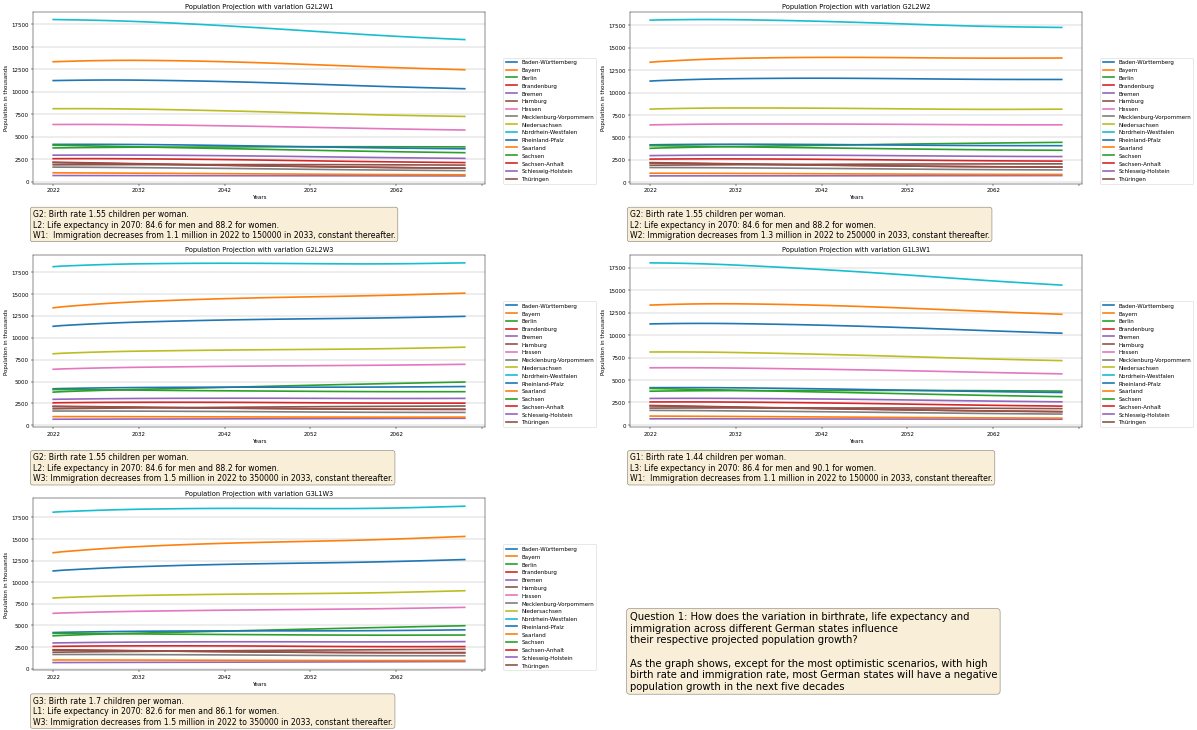

In [4]:
overall_trend(data_dict)

#### Question 2: Are there specific states that have consistently shown higher growth in projected population figures?
#### Question 3: Conversely, are there specific states that have shown a consistent decline or stagnation in their projected population figures?
To best answer these to questions, we calculate the ratio of the population in the year 2070 and the year 2022 for all states. A value of 80 means that the population in 2070 is only 80% that in 2022, which means a 20% decline in 28 years. Conversely, a value of 110 means that the population in 2070 is 10% bigger than in 2022.

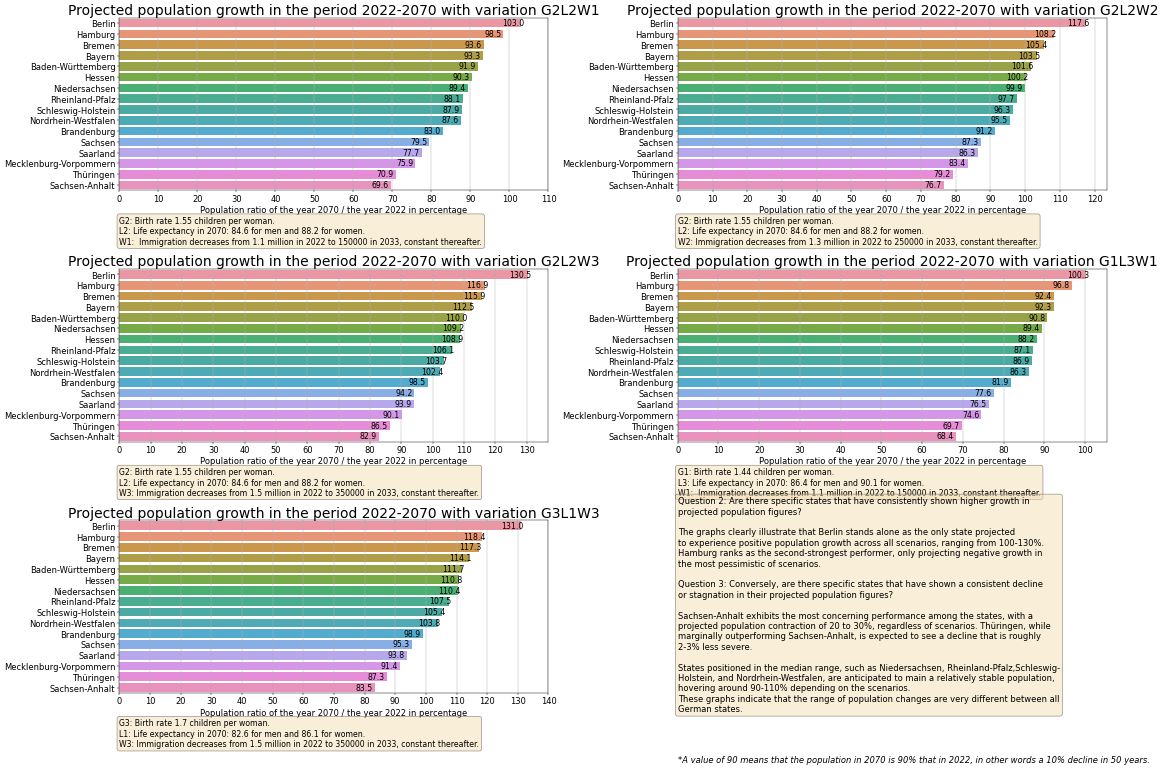

In [5]:
growth_percentage(data_dict)

#### Question 4: How will the dynamic between the most and least populous states change over the next five decades?
The most populous state is Nordrhein-Westfalen and the least populous one is Bremen. We want to make a direct comparison between these two states. We display the difference using grouped bar charts. After reviews, the data shows that Bremen will experience a more favorable population change compared to Nordrhein-Westfalen in all scenarios.

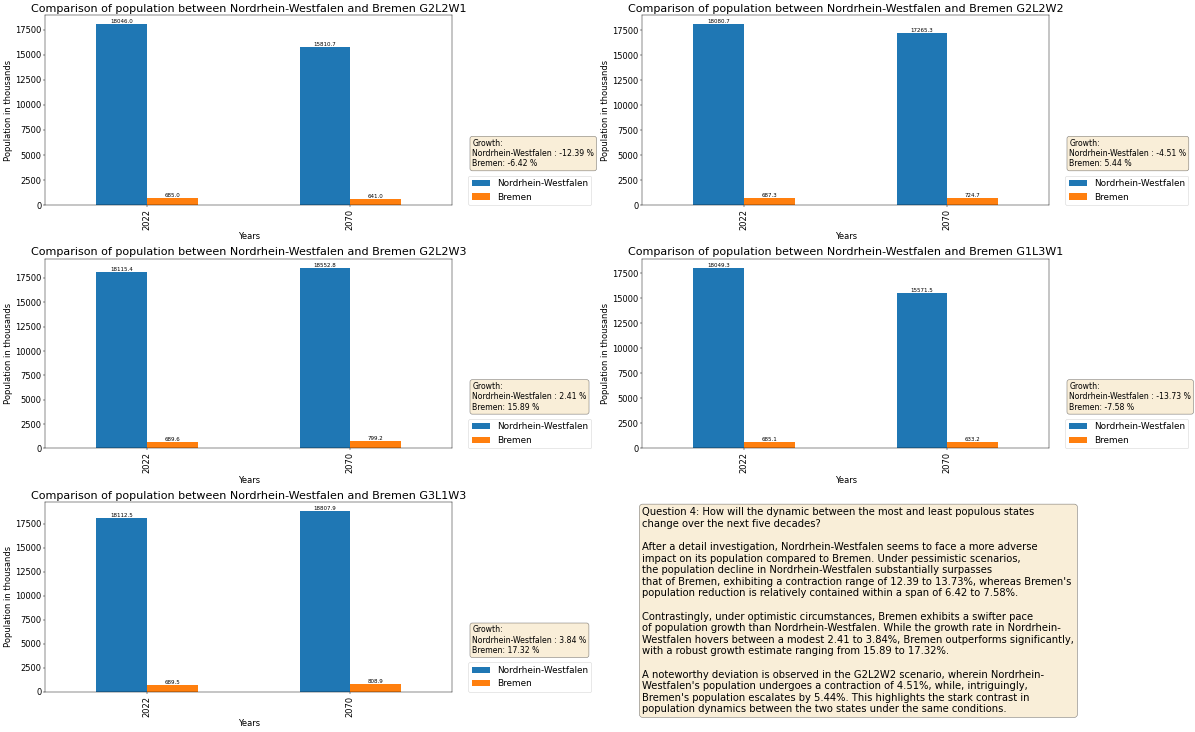

In [6]:
biggest_smallest(data_dict)

#### Question 5: How do the population projections of the former East and West Germany compare over the next five decades?
This answer can be investigated using the same bar charst we obtained in question 2, only this time the states will be colored coded according to their historical alliance after World War II. 

The former West Germany states seem to have some advantages at retaining their population. Berlin is excluded due its historical partition to both sides.

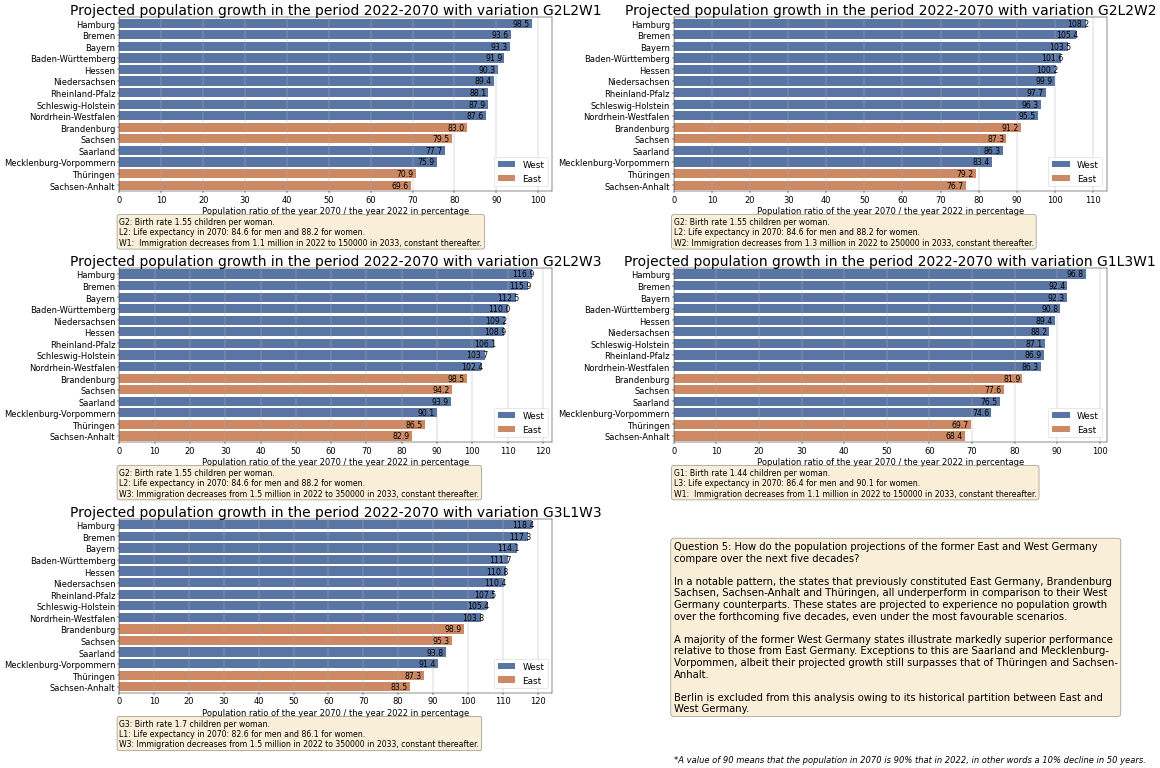

In [7]:
east_west(data_dict)

#### Question 6: Do states with larger cities have different population projection patterns compared to more rural states?
Aiming to investigate the effect of big cities on population, we use 500,000 as the cut-off point the classify the states into two categories: _Urban_ and _Rural_. According to recent data, this is the list of all states and their most populous city:

**States with Big Cities (largest city population of 500,000 or more)**:
1. Berlin: Berlin (~3,700,000)
1. Hamburg: Hamburg (~1,800,000)
1. Bavaria: Munich (~1,500,000)
1. North Rhine-Westphalia: Cologne (~1,100,000)
1. Hesse: Frankfurt (~700,000)
1. Baden-Württemberg: Stuttgart (~600,000)
1. Saxony: Leipzig (~600,000)
1. Bremen: Bremen (~570,000)
1. Lower Saxony: Hanover (~540,000)

**States with Small Cities (largest city population less than 500,000)**:
1. Saxony-Anhalt: Magdeburg (~240,000)
1. Schleswig-Holstein: Kiel (~240,000)
1. Thuringia: Erfurt (~210,000)
1. Rhineland-Palatinate: Mainz (~210,000)
1. Mecklenburg-Vorpommern: Rostock (~200,000)
1. Brandenburg: Potsdam (~180,000)
1. Saarland: Saarbrücken (~180,000)

The former West Germany states seem to have some advantages at retaining their population. 

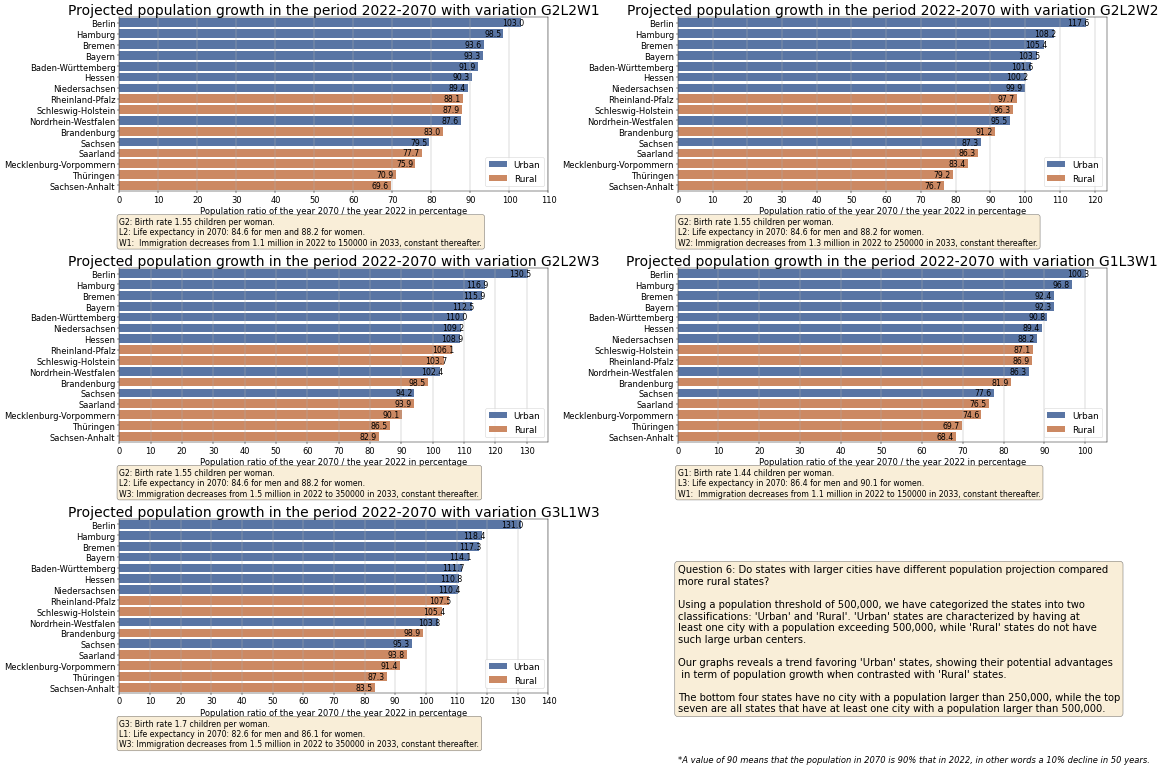

In [8]:
urban_vs_rural(data_dict)